<a href="https://colab.research.google.com/github/shahdelmasry12/Data-Mining-Project/blob/main/Bank_Marketing_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data**

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
url = "https://raw.githubusercontent.com/shahdelmasry12/Data-Mining-Project/refs/heads/main/bank.csv"
df = pd.read_csv(url)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# **Cleaning data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for column in df.columns:
  print(f"{column} : {df[column].unique()}")
  print("*"*50)

age : [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
**************************************************
job : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
**************************************************
marital : ['married' 'single' 'divorced']
**************************************************
education : ['secondary' 'tertiary' 'primary' 'unknown']
**************************************************
default : ['no' 'yes']
**************************************************
balance : [2343   45 1270 ... 1594 2593 -134]
**************************************************
housing : ['yes' 'no']
**************************************************
loan : ['no' 'yes']
*************************************

In [6]:
#To get the number of unique values for each Column
df.nunique()

,0
age,76
job,12
marital,3
education,4
default,2
balance,3805
housing,2
loan,2
contact,3
day,31


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
df.describe(include='object')


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64


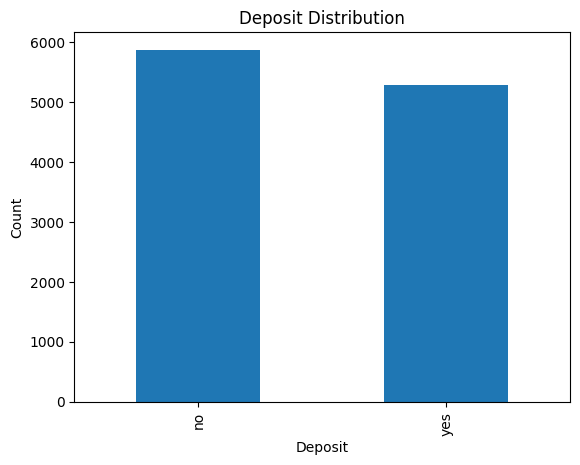

In [9]:
# Calculate the percentage for each  deposit value
print(df.deposit.value_counts(normalize=True))
df["deposit"].value_counts().plot(kind="bar")
plt.title("Deposit Distribution")
plt.xlabel("Deposit")
plt.ylabel("Count")
plt.show()

# **Data Visualization**

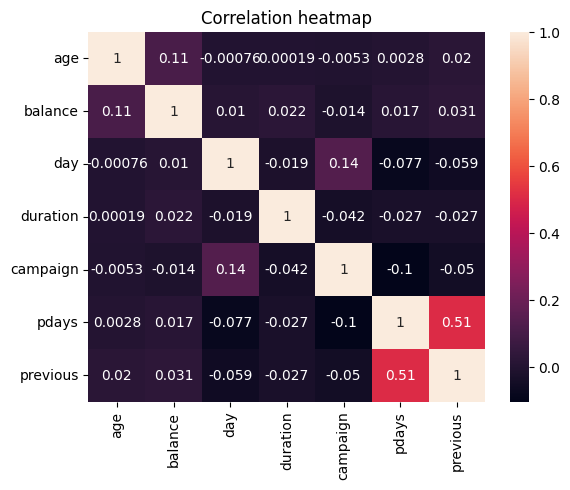

In [11]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation heatmap")
plt.show()

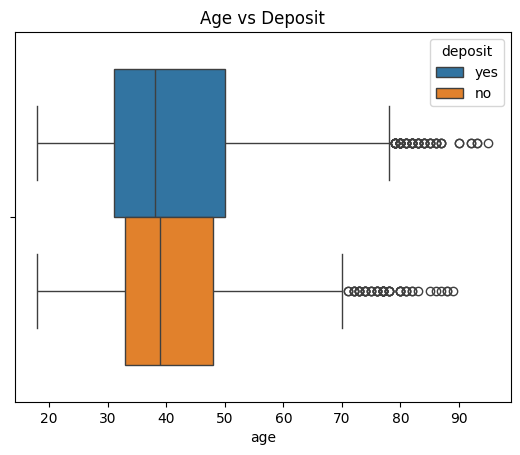

In [17]:
sns.boxplot(x="age", hue="deposit", data=df)
plt.title("Age vs Deposit")
plt.show()

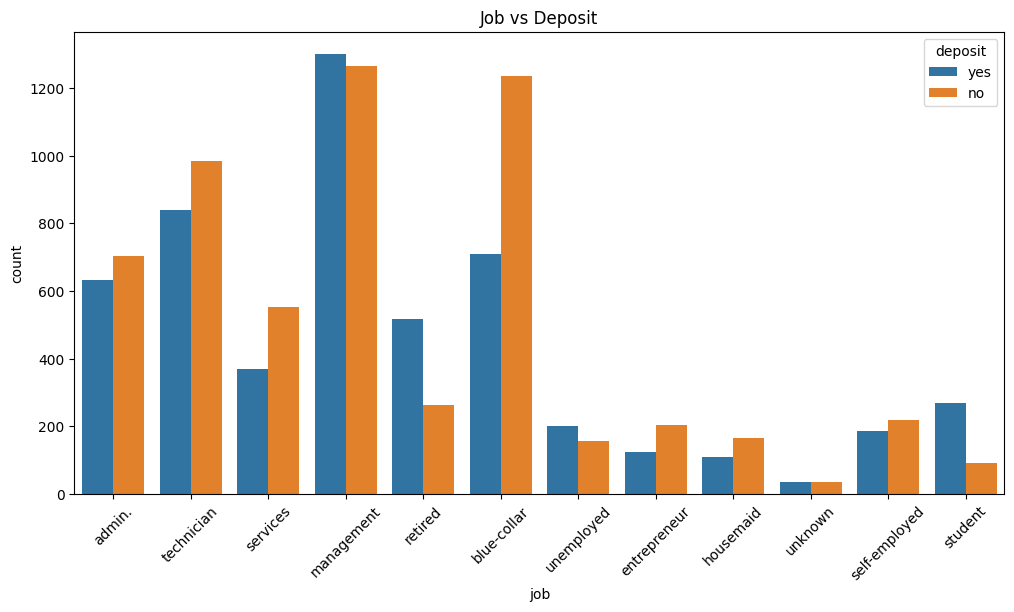

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x="job", hue="deposit", data=df)
plt.title("Job vs Deposit")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Education vs Deposit')

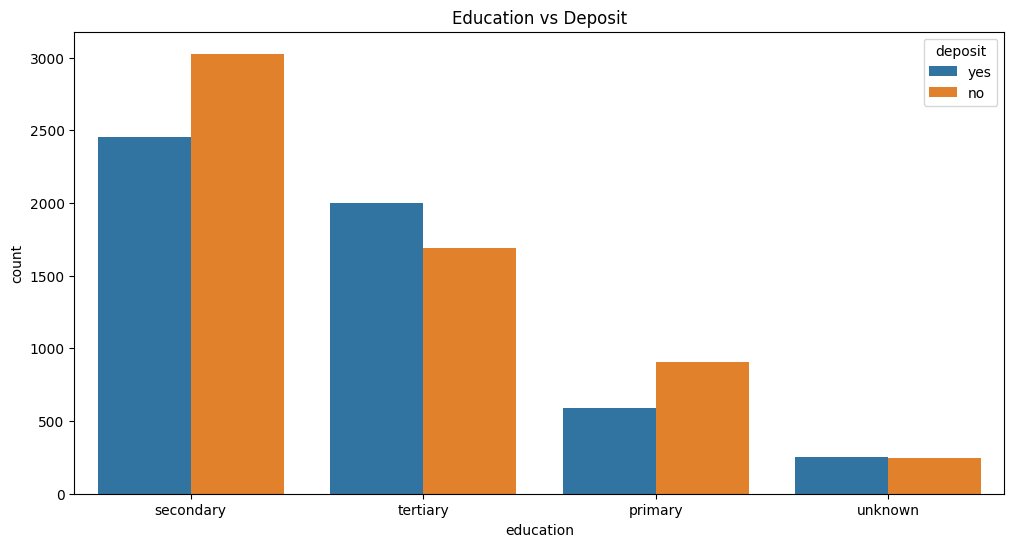

In [18]:
# education vs deposit
plt.figure(figsize=(12, 6))
sns.countplot(x="education", hue="deposit", data=df)
plt.title("Education vs Deposit")

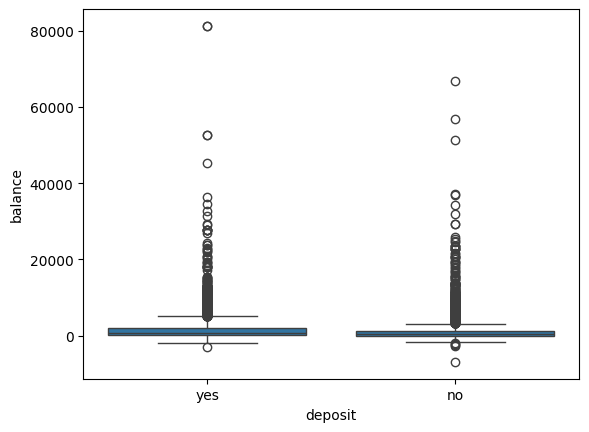

In [19]:
sns.boxplot(x="deposit", y="balance", data=df)
plt.show()

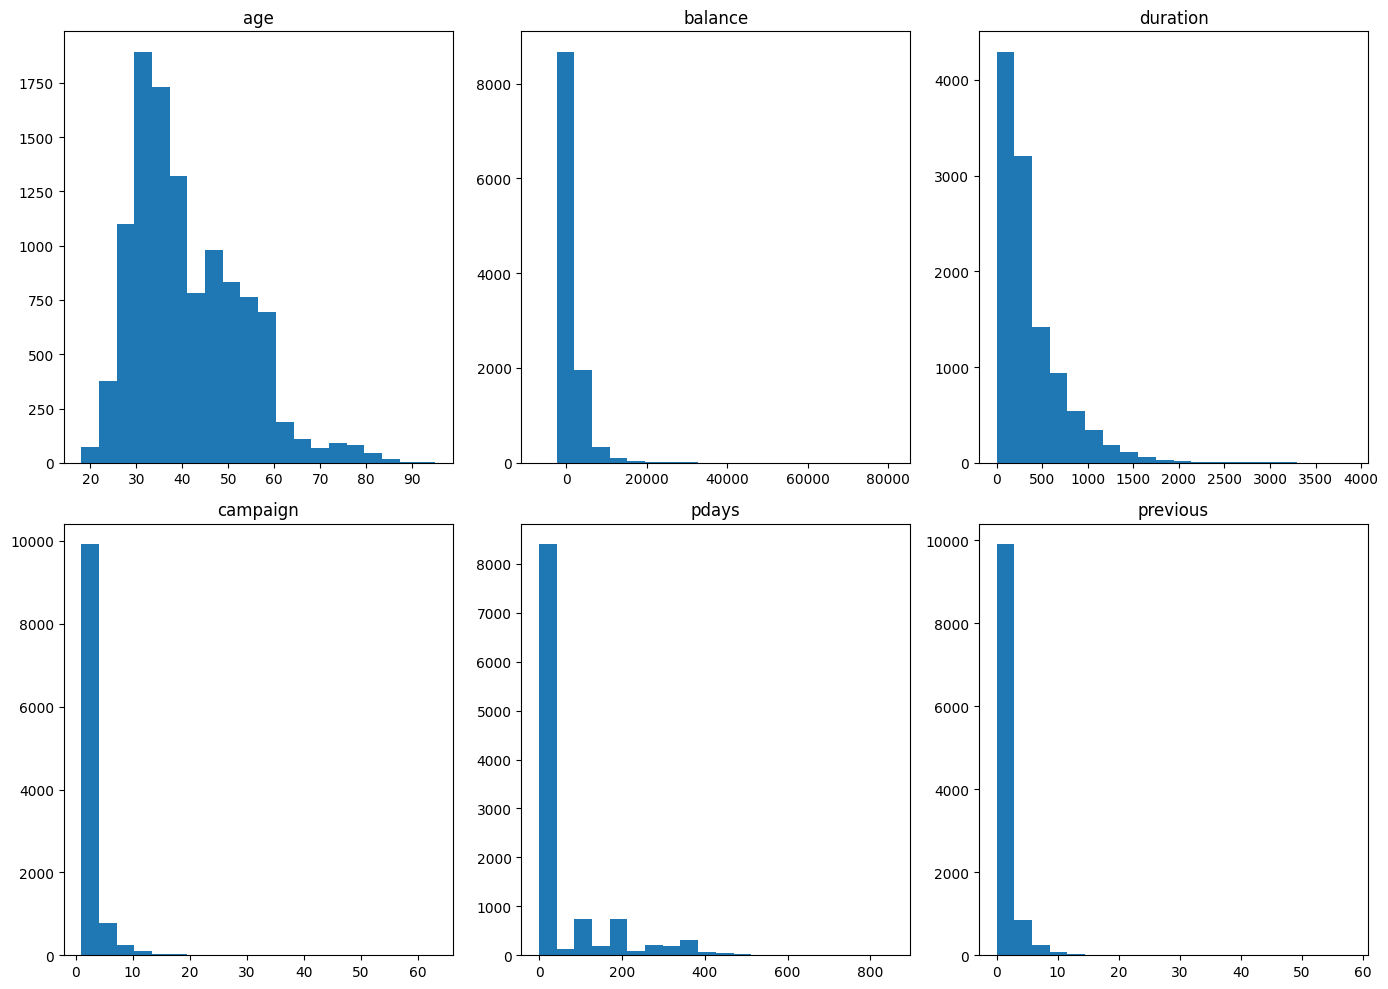

In [24]:
cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

plt.figure(figsize=(14, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=20)
    plt.title(col)


plt.show()

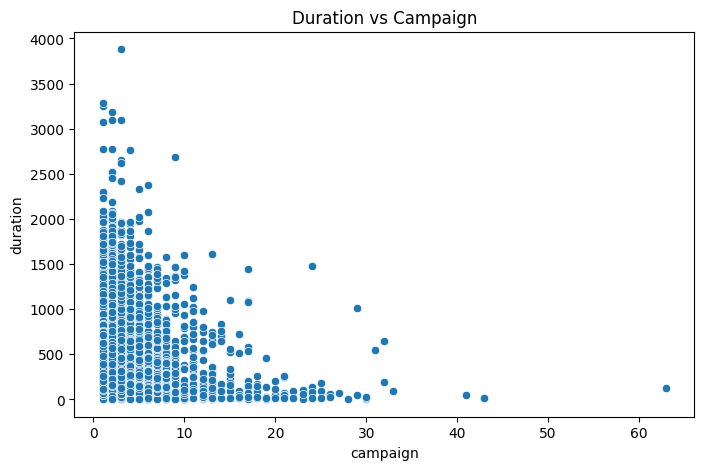

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="campaign", y="duration", data=df)
plt.title("Duration vs Campaign")
plt.show()

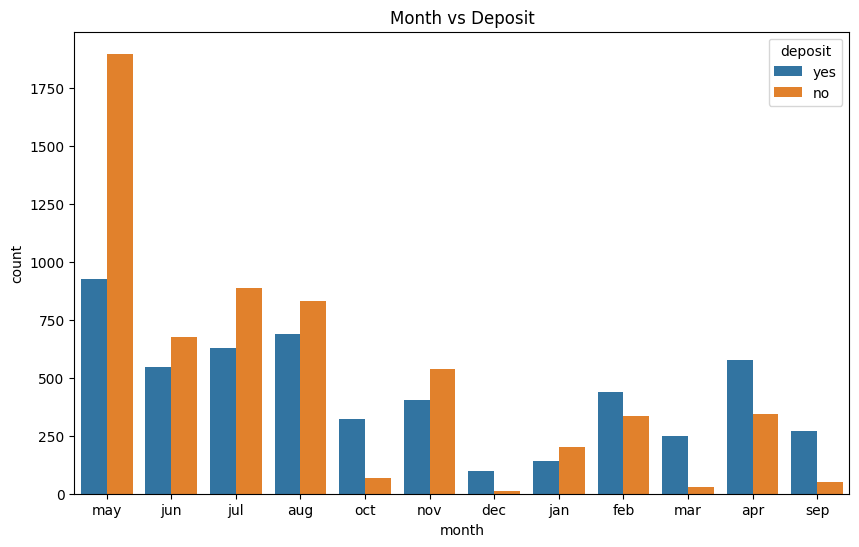

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x="month", hue="deposit", data=df)
plt.title("Month vs Deposit")
plt.show()

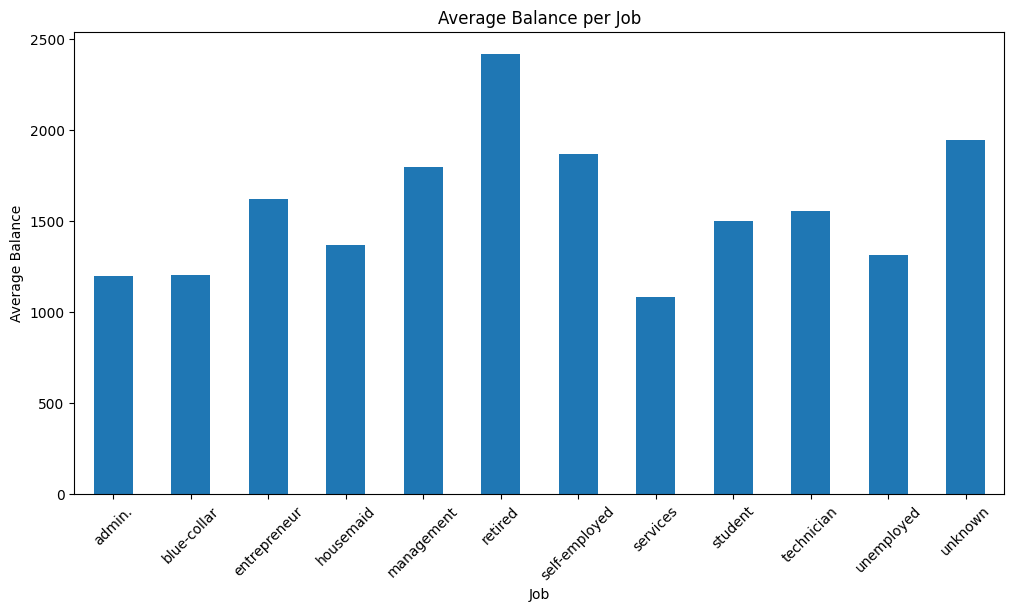

In [29]:
plt.figure(figsize=(12,6))
job_balance = df.groupby('job')['balance'].mean()
job_balance.plot(kind="bar")

plt.title("Average Balance per Job")
plt.xlabel("Job")
plt.ylabel("Average Balance")
plt.xticks(rotation=45)
plt.show()

In [30]:
cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"{col}: {len(outliers)} outliers")

age: 171 outliers
balance: 1055 outliers
duration: 636 outliers
campaign: 601 outliers
pdays: 2750 outliers
previous: 1258 outliers


In [34]:
df = df[(df['age'] >= 18) & (df['age'] <= 100)]

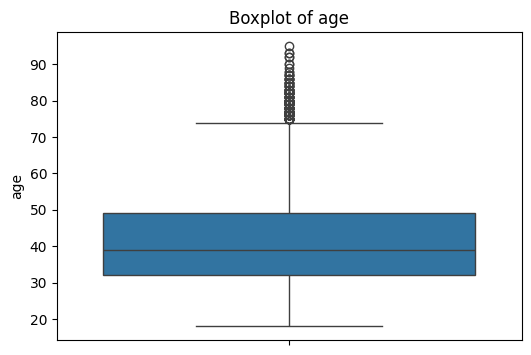

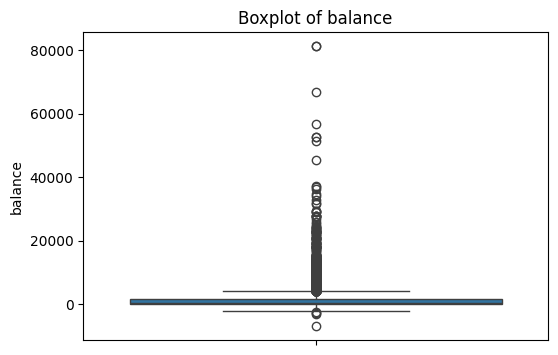

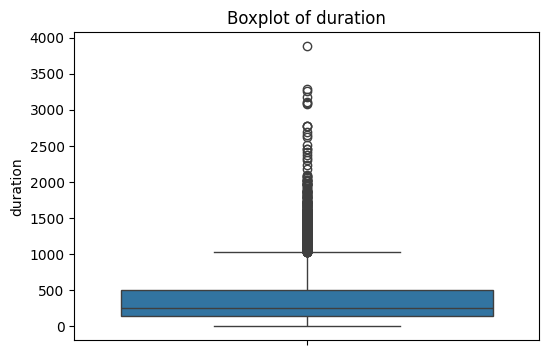

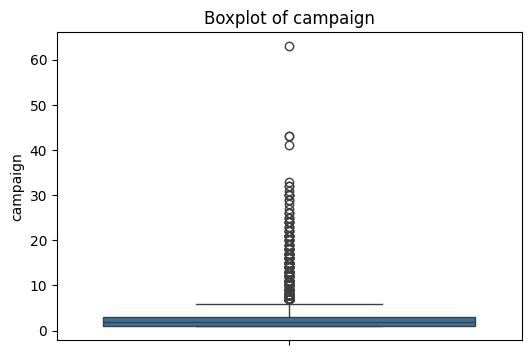

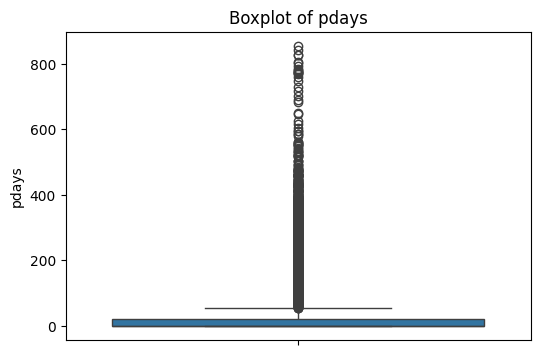

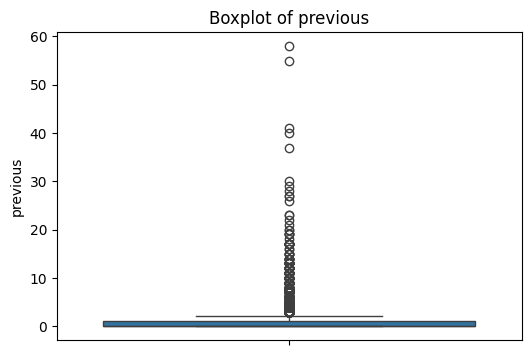

In [35]:
cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]

for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [37]:
def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

# الأعمدة اللي هنعمل لها capping
cols_to_cap = ["balance", "duration", "campaign", "previous"]

for col in cols_to_cap:
    cap_outliers(col)

In [38]:
print(df.describe())


                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1117.352804     15.658036    352.948486      2.238577   
std       11.913369   1349.670734      8.420740    284.714889      1.521158   
min       18.000000  -2257.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000   4087.000000     31.000000   1033.000000      6.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.485397  
std      108.758282      0.892563  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


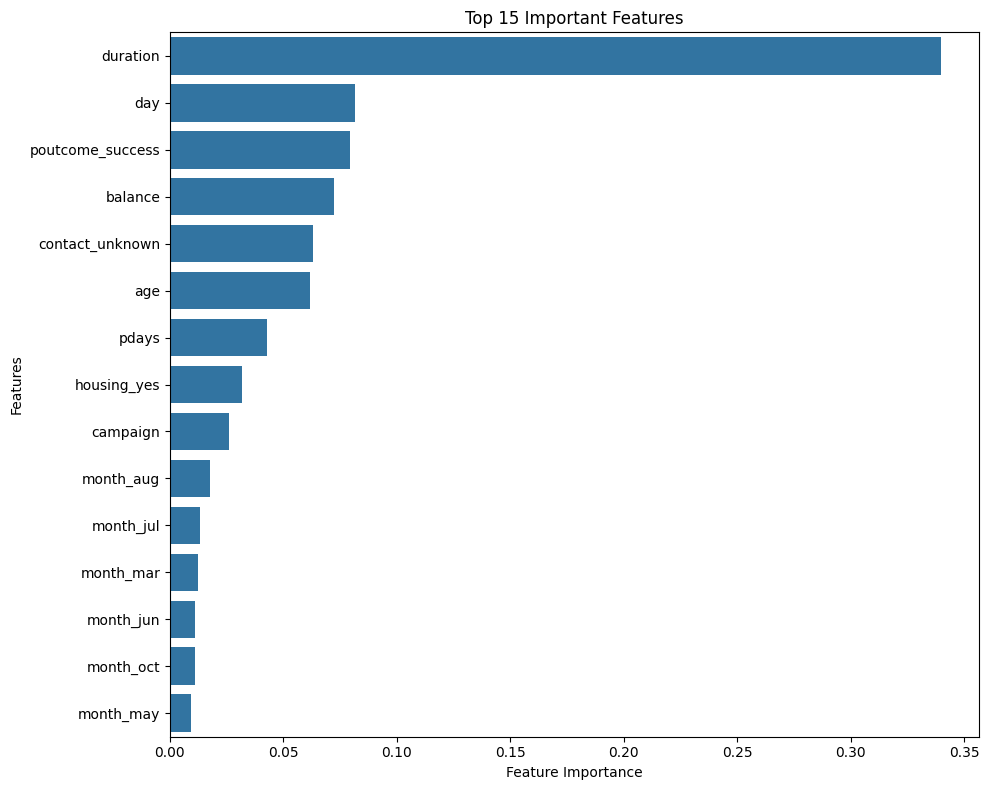

In [44]:
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance.head(15), y=feature_importance.head(15).index)
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

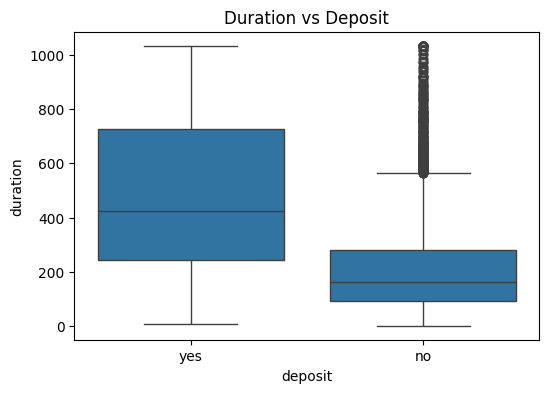

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(x="deposit", y="duration", data=df)
plt.title("Duration vs Deposit")
plt.show()